<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_2_gradien_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/Machine Learning/DataSets/DataSet2/heart_attack_prediction_dataset.csv'
dataset = pd.read_csv(file_path)
dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


Y_hat = 0.016 + 1.0*X1 


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-6-7fcb8dc24200>:28: RuntimeWarning: overflow encountered in square
  sqrerrors = np.square(errors)
<ipython-input-6-7fcb8dc24200>:33: RuntimeWarning: invalid value encountered in subtract
  theta -= sum_delta


Y_hat = nan + nan*X2 
Y_hat = nan + nan*X3 
Y_hat = nan + nan*X1 + nan*X2 + nan*X3 


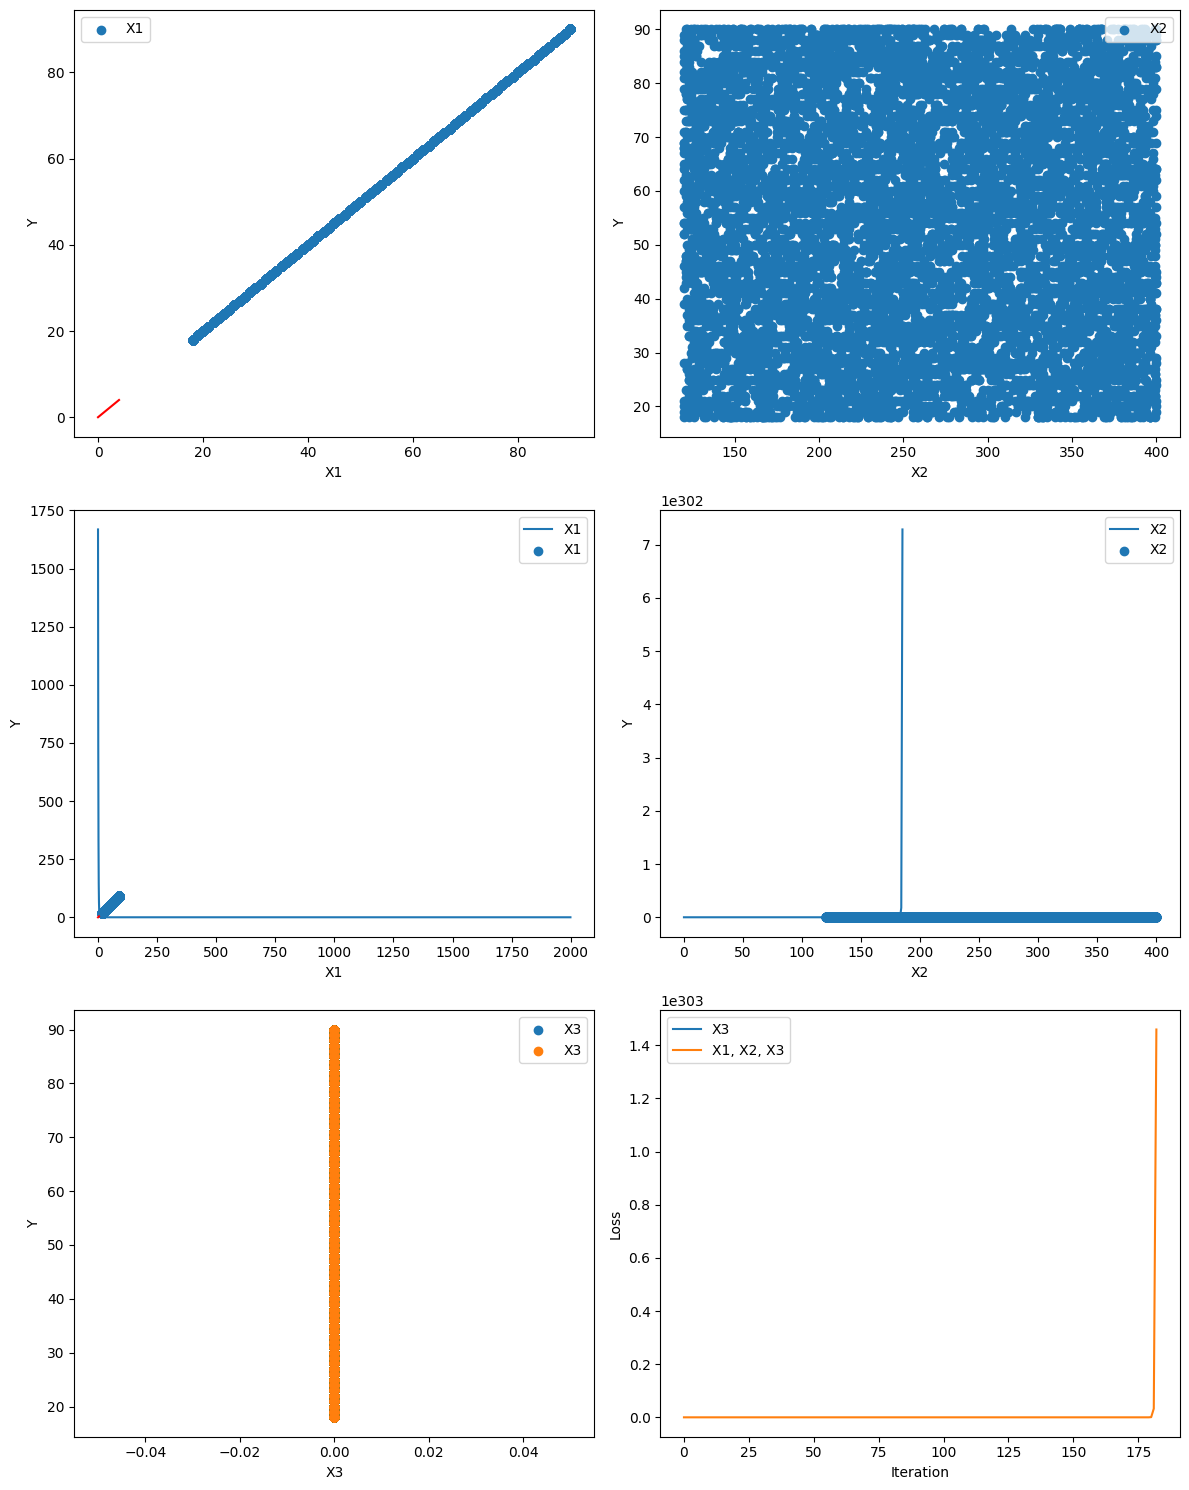

In [6]:
# One-hot encode the columns
dataset = pd.get_dummies(dataset, columns=['Patient ID','Sex','Country','Continent','Hemisphere'], drop_first=True)

# Convert all columns to numeric
dataset = dataset.apply(pd.to_numeric, errors='coerce').fillna(0)

# Parameters
alpha = 0.0001
theta2 = np.zeros(2).reshape(2, 1)
theta4 = np.zeros(4).reshape(4, 1)
iterations = 2000

# Calcs
n = len(dataset) - 1
iter = np.arange(0, iterations, 1)
reg_range = np.linspace(0, 4, 100)
# Convert the target variable to numeric
Y = dataset['Age'].values.reshape(n + 1, 1)
X0 = np.ones((n + 1, 1))
loss = []


# Cost Function iteration
def J(X, Y, theta, alpha, iterations):
    for i in range(iterations):
        Y_hat = X.dot(theta).reshape(n + 1, 1)
        errors = np.subtract(Y_hat, Y)
        sqrerrors = np.square(errors)
        cost = 1 / (2 * n + 1) * sqrerrors.sum()
        loss.append(cost)

        sum_delta = (alpha / (n + 1)) * X.transpose().dot(errors)
        theta -= sum_delta

    return theta


# Function to print linear regression equation
def print_regression_equation(theta, variables):
    equation = f"Y_hat = {round(float(theta[0]), 3)} + "
    for i in range(1, len(theta)):
        equation += f"{round(float(theta[i]), 3)}*{variables[i-1]} + "
    print(equation[:-2])  # Remove the trailing '+ '


# Plotting function
def plot_regression(ax, X_var, Y_var, Y_pred, label, xlabel):
    ax.scatter(X_var, Y_var, label=label)
    ax.plot(reg_range, Y_pred, 'r')
    ax.legend()
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Y')


# Plotting function for loss
def plot_loss(ax, loss, label):
    ax.plot(loss, label=label)
    ax.legend()
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')


# Plotting subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Plot for X1
X1 = dataset.values[:, 0].reshape(n + 1, 1)
X = np.hstack((X0, X1))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_1 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[0, 0], X1, Y, Y_1, 'X1', 'X1')
plot_loss(axs[1, 0], loss, 'X1')
print_regression_equation(theta2, ['X1'])

# Plot for X2
loss = []  # Reset loss for the next variable
X2 = dataset.values[:, 1].reshape(n + 1, 1)
X = np.hstack((X0, X2))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_2 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[0, 1], X2, Y, Y_2, 'X2', 'X2')
plot_loss(axs[1, 1], loss, 'X2')
print_regression_equation(theta2, ['X2'])

# Plot for X3
loss = []  # Reset loss for the next variable
X3 = dataset.values[:, 2].reshape(n + 1, 1)
X = np.hstack((X0, X3))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_3 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[2, 0], X3, Y, Y_3, 'X3', 'X3')
plot_loss(axs[2, 1], loss, 'X3')
print_regression_equation(theta2, ['X3'])

# Plot for 3 variables
loss = []  # Reset loss for the next variable
X = np.hstack((X0, X1, X2, X3))
theta4 = J(X, Y, theta4, alpha, iterations)
Y_4 = float(theta4[0]) + float(theta4[1]) * reg_range + float(theta4[2]) * reg_range + float(theta4[3]) * reg_range
plot_regression(axs[1, 0], X1, Y, Y_1, 'X1', 'X1')
plot_regression(axs[1, 1], X2, Y, Y_2, 'X2', 'X2')
plot_regression(axs[2, 0], X3, Y, Y_3, 'X3', 'X3')
plot_loss(axs[2, 1], loss, 'X1, X2, X3')
print_regression_equation(theta4, ['X1', 'X2', 'X3'])

plt.tight_layout()
plt.show()